<a href="https://colab.research.google.com/github/Auj7/Sustainable-Development-Data-up-to-2023/blob/main/Sustainable_Development_Data_up_to_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sustainable Development Data up to 2023
Global Trends in Sustainable Development Goals: 2000 to 2023

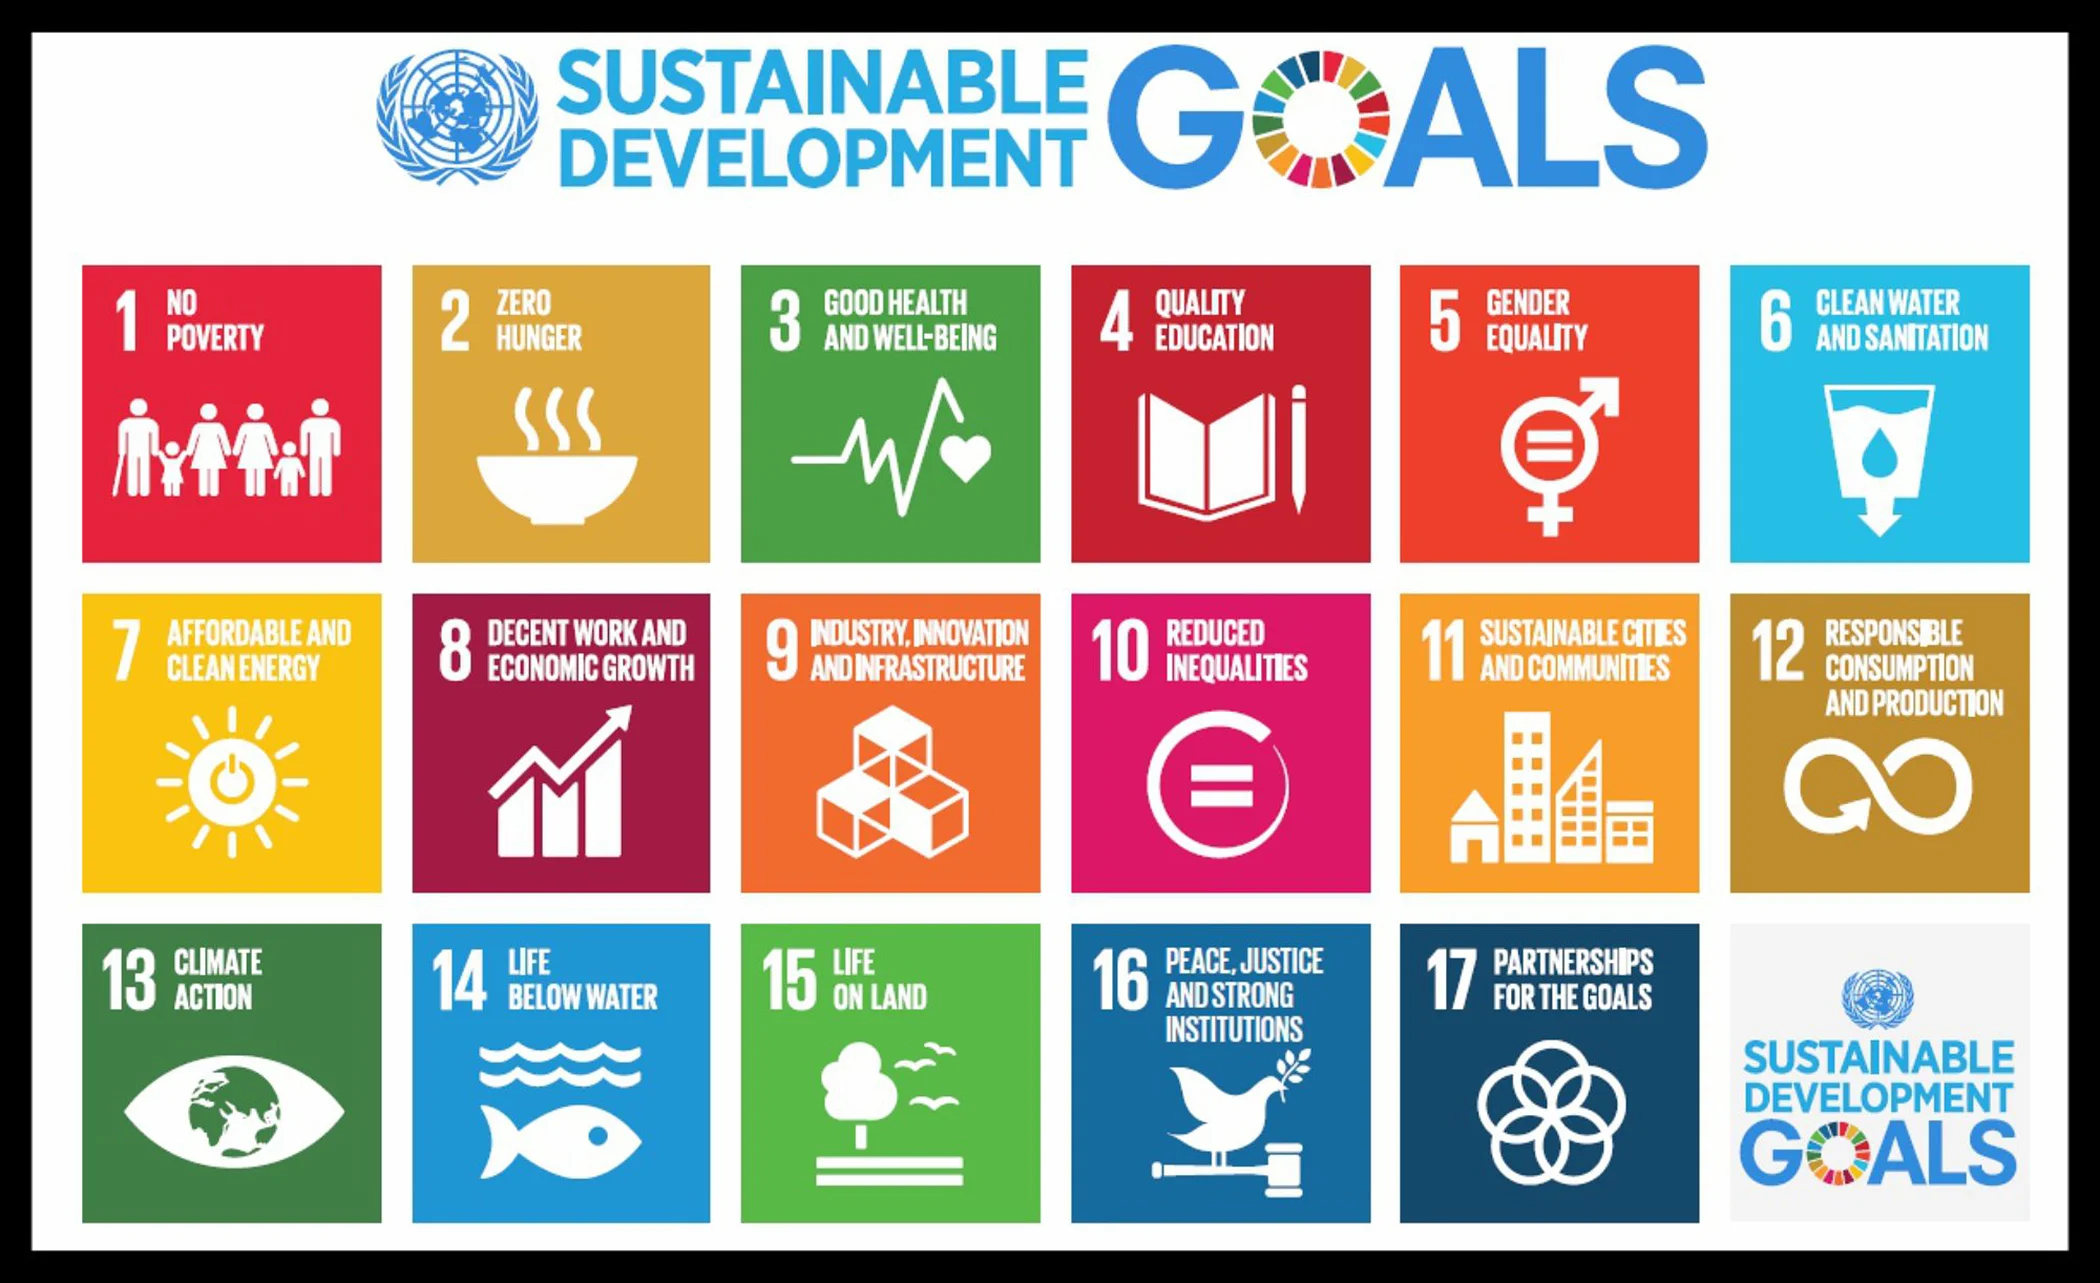

The Sustainable Development Report (SDR) reviews progress made each year on the Sustainable Development Goals since their adoption by the 193 UN Member States in 2015. At the halfway mark to 2030, the Sustainable Development Report 2023 takes stock of progress made and discusses priorities to restore and accelerate SDG progress. Published on the eve of the 2023 Paris Summit for a New Global Financial Pact, this year’s edition focuses specifically on the need to scale up development finance and to reform the global financial architecture to support the SDGs.

    Column Name:	Description
    country_code:	The country code of the respective country.
    country:	The name of the country.
    region:	The region to which the country belongs.
    overall_score:	The overall sustainability (SDG index) score of the country.
    goal_1_score:	The score for Goal 1: No Poverty.
    goal_2_score:	The score for Goal 2: Zero Hunger.
    goal_3_score:	The score for Goal 3: Good Health and Wellbeing.
    goal_4_score:	The score for Goal 4: Quality Education.
    goal_5_score:	The score for Goal 5: Gender Equality.
    goal_6_score:	The score for Goal 6: Clean Water and Sanitation.
    goal_7_score:	The score for Goal 7: Affordable and Clean Energy.
    goal_8_score:	The score for Goal 8: Decent Work and Economic Growth.
    goal_9_score:	The score for Goal 9: Industry, Innovation and Infrastructure.
    goal_10_score:	The score for Goal 10: Reduced Inequalities.
    goal_11_score:	The score for Goal 11: Sustainable Cities and Communities.
    goal_12_score:	The score for Goal 12: Responsible Consumption and Production.
    goal_13_score:	The score for Goal 13: Climate Action.
    goal_14_score:	The score for Goal 14: Life Below Water.
    goal_15_score:	The score for Goal 15: Life on Land.
    goal_16_score:	The score for Goal 16: Peace, Justice and Strong Institutions
    goal_17_score:	The score for Goal 17: Partnerships for the Goals.

The **problem** is:

*   Find the top countries in the regions that working in SDGs.
*   What goals are the most worked for in each Country and each Region.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = '/content/sustainable_development_report_2023.csv'
sdg_data = pd.read_csv(file_path)

In [6]:
sdg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country_code   166 non-null    object 
 1   country        166 non-null    object 
 2   region         166 non-null    object 
 3   overall_score  166 non-null    float64
 4   goal_1_score   151 non-null    float64
 5   goal_2_score   166 non-null    float64
 6   goal_3_score   166 non-null    float64
 7   goal_4_score   166 non-null    float64
 8   goal_5_score   166 non-null    float64
 9   goal_6_score   166 non-null    float64
 10  goal_7_score   166 non-null    float64
 11  goal_8_score   166 non-null    float64
 12  goal_9_score   166 non-null    float64
 13  goal_10_score  149 non-null    float64
 14  goal_11_score  166 non-null    float64
 15  goal_12_score  166 non-null    float64
 16  goal_13_score  166 non-null    float64
 17  goal_14_score  126 non-null    float64
 18  goal_15_sc

In [7]:
sdg_data.shape

(166, 21)

In [14]:
sdg_data.head()

,country_code,country,region,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
157,AFG,Afghanistan,E. Europe & C. Asia,49.005601,12.4105,46.915143,37.486714,34.36600,32.92625,50.4260,...,39.535000,9.724571,0.000,24.49400,96.679857,99.034333,0.000,73.2382,44.796182,45.28900
53,ALB,Albania,E. Europe & C. Asia,73.506097,98.6285,59.251857,81.918643,86.80650,60.84850,73.7458,...,66.187429,43.613000,88.071,77.36600,81.697286,90.576000,50.172,79.6008,60.698091,66.08375
55,ARM,Armenia,E. Europe & C. Asia,73.258052,96.2985,53.636286,76.966615,66.66450,68.44375,65.6224,...,73.389500,46.703857,100.000,75.57725,88.380000,91.865333,0.000,61.9420,75.554375,64.60125
52,AZE,Azerbaijan,E. Europe & C. Asia,73.527473,100.0000,62.729571,72.943357,87.66675,54.68300,66.2692,...,73.756500,41.183000,97.500,82.19400,86.302429,82.679667,0.000,65.7224,67.145143,76.03325
33,BLR,Belarus,E. Europe & C. Asia,77.495291,99.0810,63.578625,83.562714,94.94200,78.96050,83.3130,...,66.609143,55.486429,100.000,84.99625,71.070714,68.595667,0.000,94.3388,61.233091,76.04750


In [10]:
# Check for missing values in the dataset
sdg_data.isnull().sum()

country_code      0
country           0
region            0
overall_score     0
goal_1_score     15
goal_2_score      0
goal_3_score      0
goal_4_score      0
goal_5_score      0
goal_6_score      0
goal_7_score      0
goal_8_score      0
goal_9_score      0
goal_10_score    17
goal_11_score     0
goal_12_score     0
goal_13_score     0
goal_14_score    40
goal_15_score     0
goal_16_score     0
goal_17_score     0
dtype: int64

Null values in the Scores mean ZERO.

In [11]:
sdg_data = sdg_data.fillna(0)

In [12]:
sdg_data.isnull().sum()

country_code     0
country          0
region           0
overall_score    0
goal_1_score     0
goal_2_score     0
goal_3_score     0
goal_4_score     0
goal_5_score     0
goal_6_score     0
goal_7_score     0
goal_8_score     0
goal_9_score     0
goal_10_score    0
goal_11_score    0
goal_12_score    0
goal_13_score    0
goal_14_score    0
goal_15_score    0
goal_16_score    0
goal_17_score    0
dtype: int64

In [13]:
# Sort the data alphabetically by 'region' and then by 'country'
sdg_data = sdg_data.sort_values(by=['region', 'country'])

In [17]:
sdg_data.head(5)

,country_code,country,region,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
157,AFG,Afghanistan,E. Europe & C. Asia,49.005601,12.4105,46.915143,37.486714,34.36600,32.92625,50.4260,...,39.535000,9.724571,0.000,24.49400,96.679857,99.034333,0.000,73.2382,44.796182,45.28900
53,ALB,Albania,E. Europe & C. Asia,73.506097,98.6285,59.251857,81.918643,86.80650,60.84850,73.7458,...,66.187429,43.613000,88.071,77.36600,81.697286,90.576000,50.172,79.6008,60.698091,66.08375
55,ARM,Armenia,E. Europe & C. Asia,73.258052,96.2985,53.636286,76.966615,66.66450,68.44375,65.6224,...,73.389500,46.703857,100.000,75.57725,88.380000,91.865333,0.000,61.9420,75.554375,64.60125
52,AZE,Azerbaijan,E. Europe & C. Asia,73.527473,100.0000,62.729571,72.943357,87.66675,54.68300,66.2692,...,73.756500,41.183000,97.500,82.19400,86.302429,82.679667,0.000,65.7224,67.145143,76.03325
33,BLR,Belarus,E. Europe & C. Asia,77.495291,99.0810,63.578625,83.562714,94.94200,78.96050,83.3130,...,66.609143,55.486429,100.000,84.99625,71.070714,68.595667,0.000,94.3388,61.233091,76.04750


In [18]:
#to check duplications
sdg_data.duplicated().sum()

0

In [20]:
# Splitting categorical and numerical columns
CateCol = sdg_data.select_dtypes(include=['object']).columns
numCol = sdg_data.select_dtypes(include=['int', 'float']).columns

In [24]:
print(sdg_data['region'].nunique())

7


In [21]:
sdg_data['region'].unique()

array(['E. Europe & C. Asia', 'East & South Asia', 'LAC', 'MENA', 'OECD',
       'Oceania', 'Sub-Saharan Africa'], dtype=object)

    E. Europe & C. Asia (Eastern Europe and Central Asia)
    East & South Asia
    LAC (Latin America and the Caribbean)
    MENA (Middle East and North Africa)
    OECD (Organisation for Economic Co-operation and Development)
    Oceania
    Sub-Saharan Africa

In [25]:
print(sdg_data['region'].value_counts())

Sub-Saharan Africa     45
OECD                   38
E. Europe & C. Asia    23
LAC                    23
East & South Asia      19
MENA                   16
Oceania                 2
Name: region, dtype: int64


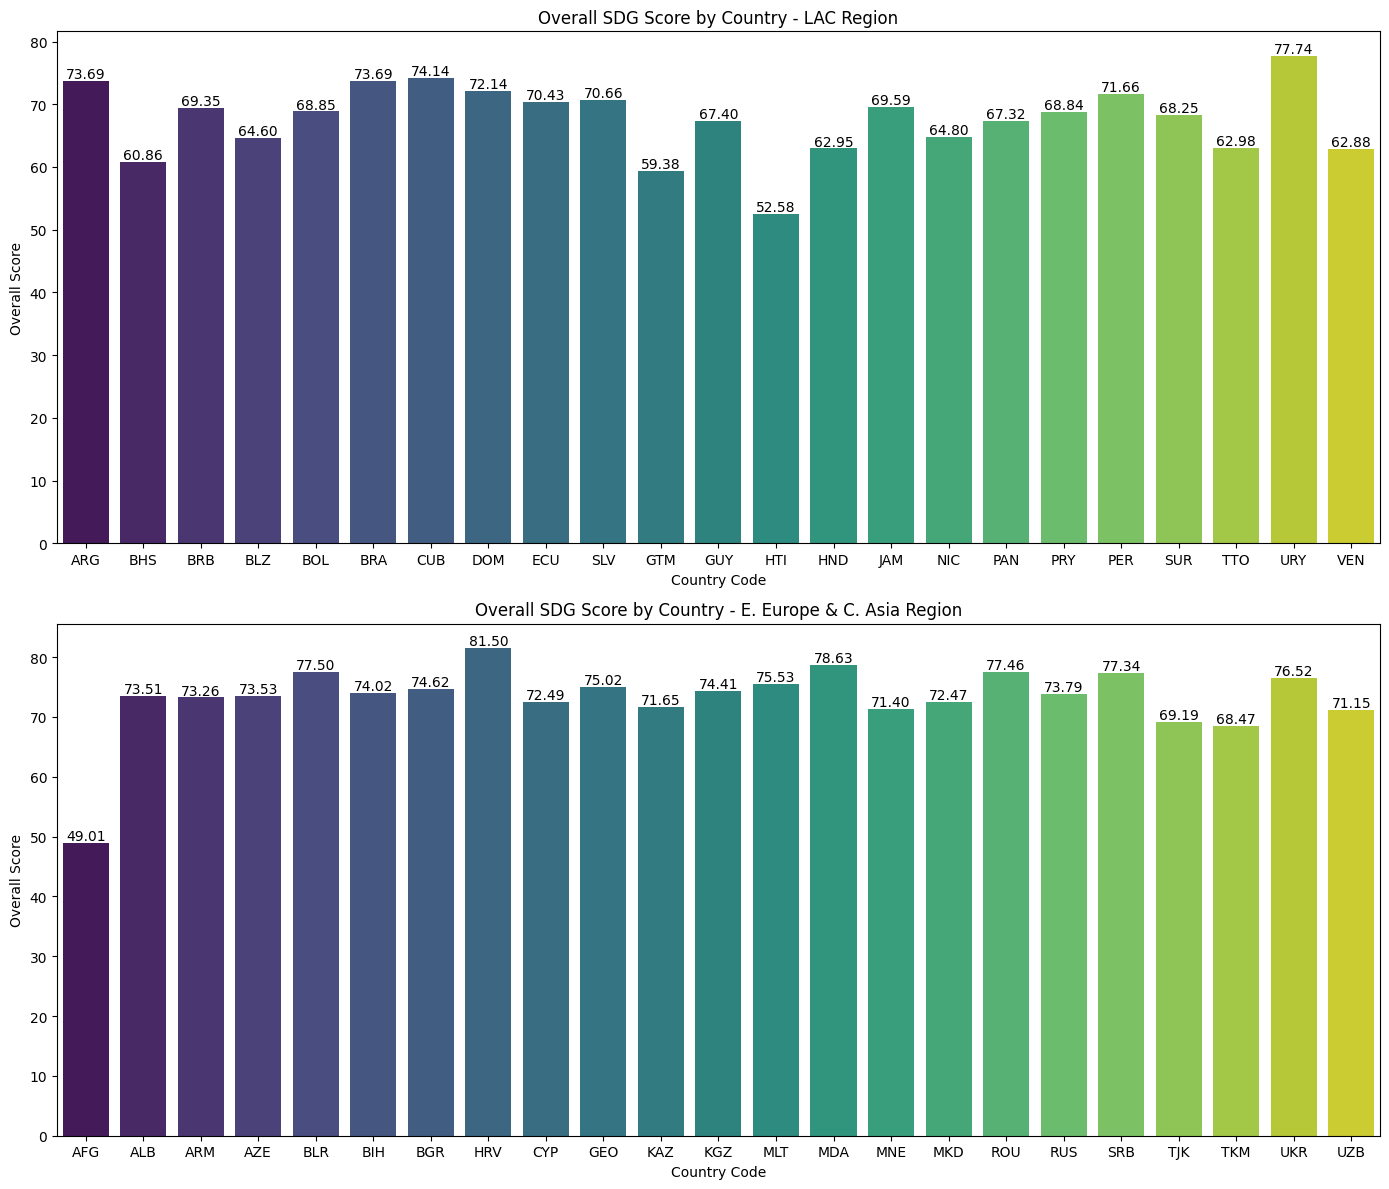

In [28]:
# Filter the dataset for the two specified regions: 'LAC' and 'E. Europe & C. Asia'
lac_data = sdg_data[sdg_data['region'] == 'LAC']
e_europe_c_asia_data = sdg_data[sdg_data['region'] == 'E. Europe & C. Asia']

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot the column chart for 'LAC' region
sns.barplot(x='country_code', y='overall_score', data=lac_data, ax=axes[0], palette='viridis')
axes[0].set_title('Overall SDG Score by Country - LAC Region')
axes[0].set_ylabel('Overall Score')
axes[0].set_xlabel('Country Code')

# Annotate the bars with the overall score values rounded to 2 decimal places
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

# Plot the column chart for 'E. Europe & C. Asia' region
sns.barplot(x='country_code', y='overall_score', data=e_europe_c_asia_data, ax=axes[1], palette='viridis')
axes[1].set_title('Overall SDG Score by Country - E. Europe & C. Asia Region')
axes[1].set_ylabel('Overall Score')
axes[1].set_xlabel('Country Code')

# Annotate the bars with the overall score values rounded to 2 decimal places
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

plt.tight_layout()
plt.show()


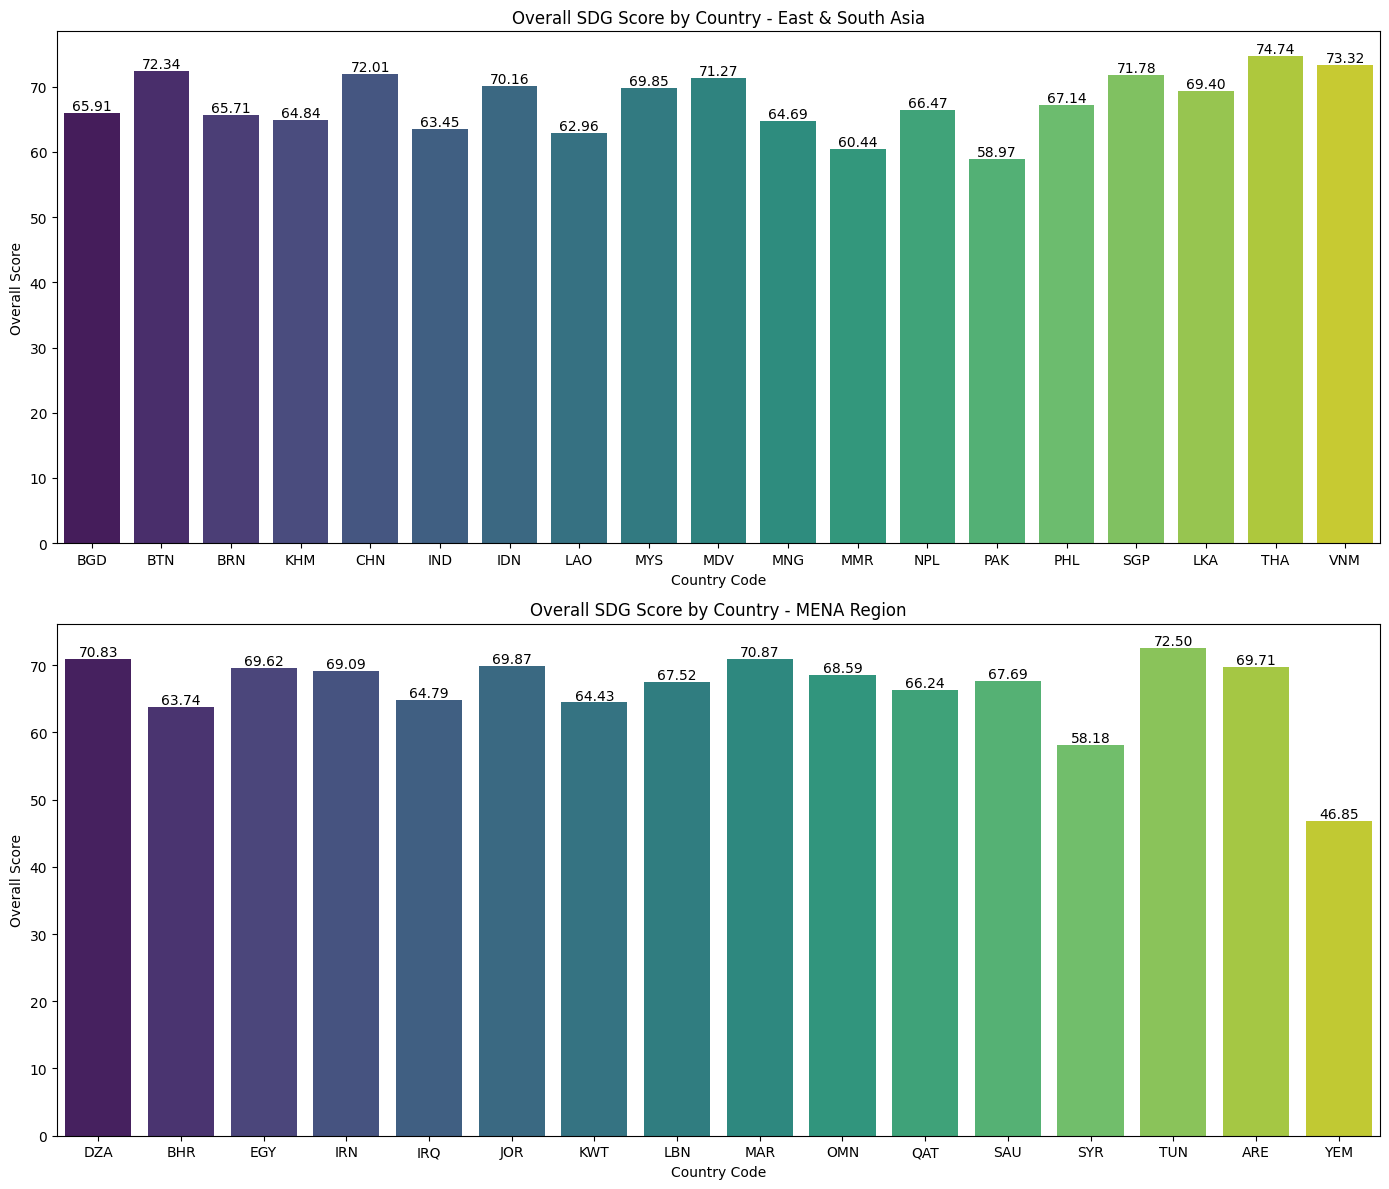

In [30]:
# Filter the dataset for the two specified regions: 'East & South Asia' and 'MENA'
E_S_Asia_data = sdg_data[sdg_data['region'] == 'East & South Asia']
MENA_data = sdg_data[sdg_data['region'] == 'MENA']

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot the column chart for 'East & South Asia' region
sns.barplot(x='country_code', y='overall_score', data=E_S_Asia_data, ax=axes[0], palette='viridis')
axes[0].set_title('Overall SDG Score by Country - East & South Asia')
axes[0].set_ylabel('Overall Score')
axes[0].set_xlabel('Country Code')

# Annotate the bars with the overall score values rounded to 2 decimal places
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

# Plot the column chart for 'MENA' region
sns.barplot(x='country_code', y='overall_score', data=MENA_data, ax=axes[1], palette='viridis')
axes[1].set_title('Overall SDG Score by Country - MENA Region')
axes[1].set_ylabel('Overall Score')
axes[1].set_xlabel('Country Code')

# Annotate the bars with the overall score values rounded to 2 decimal places
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

plt.tight_layout()
plt.show()


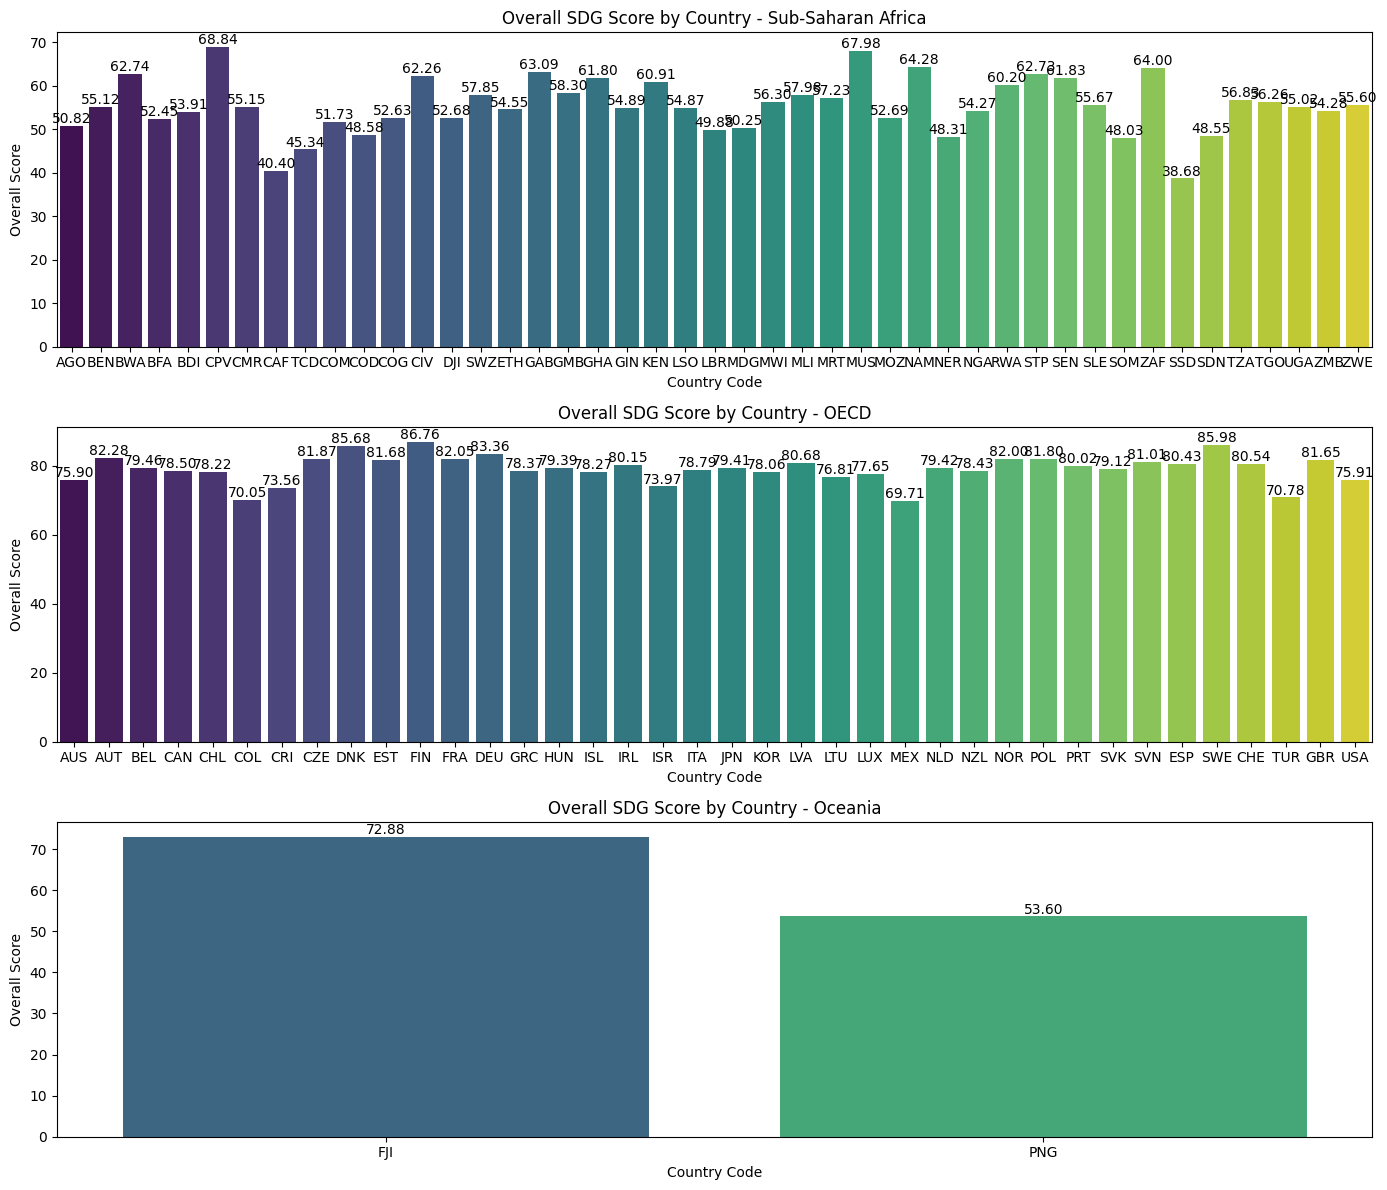

In [34]:
# Filter the dataset for the two specified regions: 'Sub-Saharan Africa' and 'OECD'
Sub_Saharan_Africa_data = sdg_data[sdg_data['region'] == 'Sub-Saharan Africa']
OECD_data = sdg_data[sdg_data['region'] == 'OECD']
Oceania_data = sdg_data[sdg_data['region'] == 'Oceania']

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Plot the column chart for 'Sub-Saharan Africa' region
sns.barplot(x='country_code', y='overall_score', data=Sub_Saharan_Africa_data, ax=axes[0], palette='viridis')
axes[0].set_title('Overall SDG Score by Country - Sub-Saharan Africa')
axes[0].set_ylabel('Overall Score')
axes[0].set_xlabel('Country Code')

# Annotate the bars with the overall score values rounded to 2 decimal places
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

# Plot the column chart for 'OECD' region
sns.barplot(x='country_code', y='overall_score', data=OECD_data, ax=axes[1], palette='viridis')
axes[1].set_title('Overall SDG Score by Country - OECD')
axes[1].set_ylabel('Overall Score')
axes[1].set_xlabel('Country Code')

# Annotate the bars with the overall score values rounded to 2 decimal places
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')


# Plot the column chart for 'Oceania' region
sns.barplot(x='country_code', y='overall_score', data=Oceania_data, ax=axes[2], palette='viridis')
axes[2].set_title('Overall SDG Score by Country - Oceania')
axes[2].set_ylabel('Overall Score')
axes[2].set_xlabel('Country Code')

# Annotate the bars with the overall score values rounded to 2 decimal places
for p in axes[2].patches:
    axes[2].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

plt.tight_layout()
plt.show()


In [38]:
# Calculate the average of overall_score in each region
avg_by_region = sdg_data.groupby('region')['overall_score'].mean().reset_index()

# Rename the column to indicate it represents the average overall score
avg_by_region.rename(columns={'overall_score': 'average_overall_score'}, inplace=True)

# Display the new dataset containing the average overall score in each region
avg_by_region


,region,average_overall_score
0,E. Europe & C. Asia,73.149119
1,East & South Asia,67.655676
2,LAC,67.598713
3,MENA,66.283838
4,OECD,79.150447
5,Oceania,63.240749
6,Sub-Saharan Africa,55.461529


In [35]:
# Find the top country according to overall_score in each region
top_by_region = sdg_data.groupby('region').apply(lambda x: x.nlargest(1, 'overall_score')).reset_index(drop=True)

# Display the new dataset containing the top country in each region and its features
top_by_region


,country_code,country,region,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,HRV,Croatia,E. Europe & C. Asia,81.495509,99.9905,74.260000,86.357857,95.655000,71.10500,86.35700,...,82.744429,74.679286,94.1840,80.735500,68.325429,83.505667,84.611333,88.16980,72.106100,59.437500
1,THA,Thailand,East & South Asia,74.738629,98.6020,58.642000,79.684643,97.978250,70.68800,76.00880,...,77.199000,67.409429,73.1555,86.568750,80.630857,81.625500,64.217667,60.21880,62.845000,62.339500
2,URY,Uruguay,LAC,77.738374,98.4625,67.562250,84.733929,90.707750,76.37550,75.79300,...,84.241714,59.871714,51.8315,92.535000,70.791571,92.452667,60.000667,59.05040,78.127273,81.492667
3,TUN,Tunisia,MENA,72.503497,97.9125,61.538750,78.918714,93.118667,50.97175,63.93760,...,62.535571,55.939429,80.8475,65.401250,86.689000,93.076000,63.312167,70.90240,60.575909,76.679000
4,FIN,Finland,OECD,86.760595,99.5750,60.886750,95.386385,97.169333,92.11125,94.32760,...,86.789000,95.995714,98.4685,91.233750,60.059571,68.793667,87.928000,85.07000,92.521091,75.601000
5,FJI,Fiji,Oceania,72.877044,89.6515,61.233375,71.167692,93.642333,59.03150,72.39325,...,53.262500,60.350833,88.1180,93.975667,84.620333,96.017500,73.079667,45.78260,71.831000,61.399000
6,CPV,Cabo Verde,Sub-Saharan Africa,68.835711,84.8650,44.975667,75.470615,79.230000,76.15000,67.39200,...,58.662667,41.019500,41.6080,79.523500,81.265500,97.147500,57.048800,71.64025,79.257333,73.034250


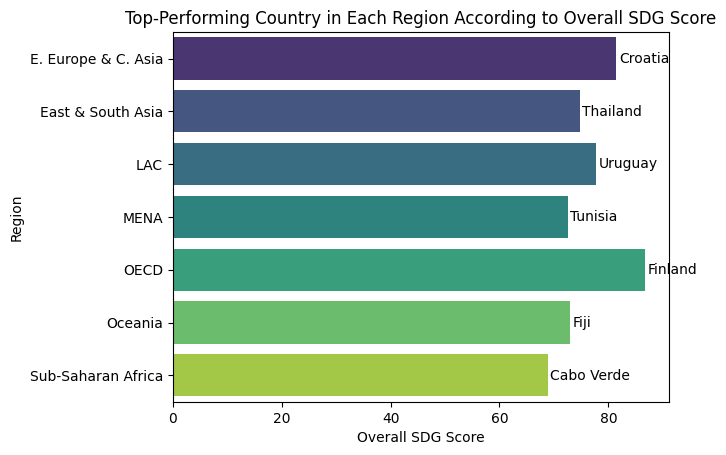

In [36]:
# Create a horizontal bar chart
sns.barplot(x='overall_score', y='region', data=top_by_region, palette='viridis')

# Annotate the bars with the name of the top-performing country in each region
for index, row in top_by_region.iterrows():
    plt.text(row['overall_score'] + 0.5, index, row['country'], color='black', va='center')

# Set labels and title
plt.xlabel('Overall SDG Score')
plt.ylabel('Region')
plt.title('Top-Performing Country in Each Region According to Overall SDG Score')

plt.show()


In [42]:
# Define a dictionary mapping the original goal column names to the descriptive names
goal_name_mapping = {
    'goal_1_score': 'Goal 1: No Poverty',
    'goal_2_score': 'Goal 2: Zero Hunger',
    'goal_3_score': 'Goal 3: Good Health and Wellbeing',
    'goal_4_score': 'Goal 4: Quality Education',
    'goal_5_score': 'Goal 5: Gender Equality',
    'goal_6_score': 'Goal 6: Clean Water and Sanitation',
    'goal_7_score': 'Goal 7: Affordable and Clean Energy',
    'goal_8_score': 'Goal 8: Decent Work and Economic Growth',
    'goal_9_score': 'Goal 9: Industry, Innovation and Infrastructure',
    'goal_10_score': 'Goal 10: Reduced Inequalities',
    'goal_11_score': 'Goal 11: Sustainable Cities and Communities',
    'goal_12_score': 'Goal 12: Responsible Consumption and Production',
    'goal_13_score': 'Goal 13: Climate Action',
    'goal_14_score': 'Goal 14: Life Below Water',
    'goal_15_score': 'Goal 15: Life on Land',
    'goal_16_score': 'Goal 16: Peace, Justice and Strong Institutions',
    'goal_17_score': 'Goal 17: Partnerships for the Goals'
}

# Define the goal score columns
goal_columns = [f'goal_{i}_score' for i in range(1, 18)]

# Initialize a list to store the results
highest_countries_by_goal = []

# Iterate through each goal score column and identify the highest country
for goal_column in goal_columns:
    # Find the row with the highest score for the current goal column
    highest_country_row = sdg_data.loc[sdg_data[goal_column].idxmax()]

    # Extract the country, region, and score information
    highest_country = highest_country_row['country']
    #highest_region = highest_country_row['region']
    highest_score = highest_country_row[goal_column]

    # Append the result to the list
    highest_countries_by_goal.append({'goal': goal_column,
                                      'highest_country': highest_country,
                                      #'highest_region': highest_region,
                                      'highest_score': highest_score})

# Create a DataFrame from the results list
highest_countries_by_goal_df = pd.DataFrame(highest_countries_by_goal)

# Replace the goal column names in the DataFrame with the descriptive names
highest_countries_by_goal_df['goal'] = highest_countries_by_goal_df['goal'].map(goal_name_mapping)

# Display the resulting DataFrame
highest_countries_by_goal_df


,goal,highest_country,highest_score
0,Goal 1: No Poverty,Azerbaijan,100.000000
1,Goal 2: Zero Hunger,China,83.401125
2,Goal 3: Good Health and Wellbeing,Norway,97.115143
3,Goal 4: Quality Education,Sweden,99.761667
4,Goal 5: Gender Equality,Iceland,94.021667
5,Goal 6: Clean Water and Sanitation,Sweden,95.057600
6,Goal 7: Affordable and Clean Energy,Iceland,99.550750
7,Goal 8: Decent Work and Economic Growth,Cuba,93.382750
8,"Goal 9: Industry, Innovation and Infrastructure","Korea, Rep.",99.128857
9,Goal 10: Reduced Inequalities,Armenia,100.000000


In [45]:
# Initialize a list to store the results
highest_regions_by_goal = []

# Iterate through each goal score column and identify the region with the highest average score
for goal_column, goal_name in goal_name_mapping.items():
    # Calculate the average score for each region for the current goal column
    avg_score_by_region = sdg_data.groupby('region')[goal_column].mean()

    # Find the region with the highest average score for the current goal column
    highest_region_row = avg_score_by_region.idxmax()
    highest_score = avg_score_by_region.max()

    # Append the result to the list
    highest_regions_by_goal.append({'goal': goal_name, 'highest_region': highest_region_row, 'average_score': highest_score})

# Create a DataFrame from the results list
highest_regions_by_goal_df = pd.DataFrame(highest_regions_by_goal)

# Display the resulting DataFrame
highest_regions_by_goal_df


,goal,highest_region,average_score
0,Goal 1: No Poverty,OECD,95.572145
1,Goal 2: Zero Hunger,OECD,65.822855
2,Goal 3: Good Health and Wellbeing,OECD,91.475179
3,Goal 4: Quality Education,OECD,96.164055
4,Goal 5: Gender Equality,OECD,79.453989
5,Goal 6: Clean Water and Sanitation,OECD,83.690189
6,Goal 7: Affordable and Clean Energy,OECD,78.800232
7,Goal 8: Decent Work and Economic Growth,OECD,82.690823
8,"Goal 9: Industry, Innovation and Infrastructure",OECD,85.681425
9,Goal 10: Reduced Inequalities,OECD,79.175671
